Exercise 1: Filling in the gaps with Python
===========================================

Because we don't yet know much about Julia, we can fall back to Python to cover gaps in our knowledge. This can be really useful if we want to use a script that we've written or a library only available in Python to do some processing. 

A simple task is:

* Import some data representing an exponential decay with some noise added
* Using scipy.optimize, fit an exponential decay model to it using least squares
* Plot the results
* Print the fitted parameters

The data are located in a [CSV file](data/expdecay.csv).

In [1]:
# Here's the code I used to generate the data

A = 3.6
τ = 1.7

xs = linspace(0, 5)
noise() = 0.5 + rand()

expdecay(x::Real) = A*exp(-x/τ) * noise()
@vectorize_1arg Real expdecay

ys = expdecay(xs)

open("data/expdecay.csv", "w") do f
    write(f, "# x,y\n")
    writecsv(f, [xs ys])
end

In [2]:
# First we need the ability to call Python

using PyCall
using PyPlot
@pyimport scipy.optimize as spo

INFO: Loading help data...


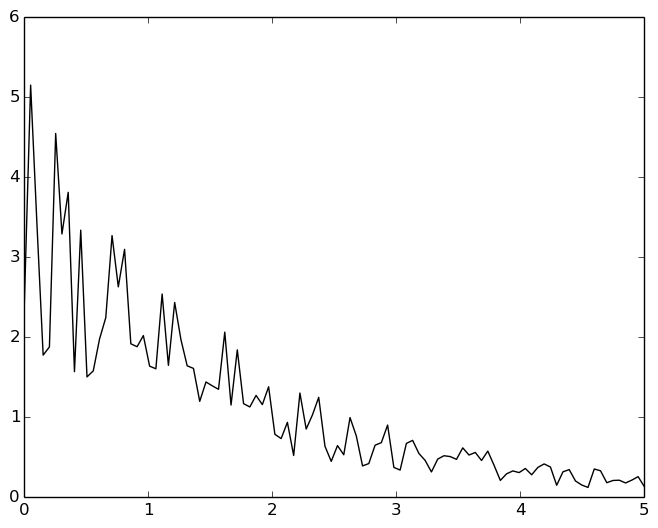

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7effdfa2cb10>

In [3]:
# Load the data and have a look at it
data = readcsv("data/expdecay.csv")
x, y = data[:, 1], data[:, 2]

figure()
plot(x, y, "k-")

In [4]:
# Exponential model
expmodel(x, A, τ) = A * exp(-x/τ)

# In the form that Scipy expects
expmodel(pars, x) = expmodel(x, pars[1], pars[2])

# the error function
errfunc(pars) = expmodel(pars, x) - y

# initial guesses at A and τ
guesses = [1, 1]

2-element Array{Int64,1}:
 1
 1

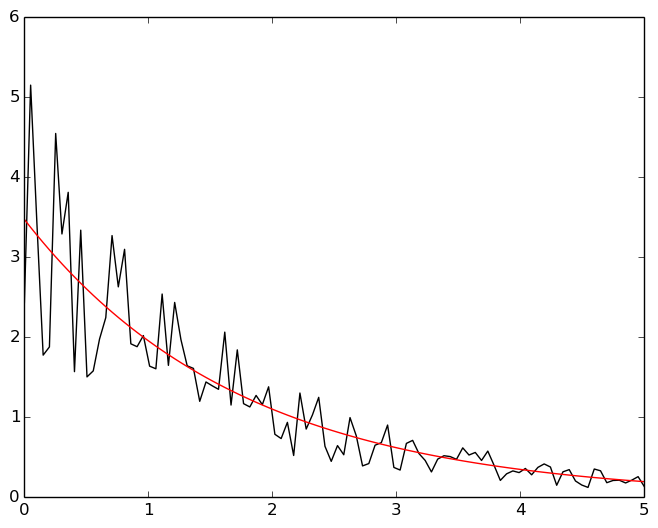

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7effdf92f750>

In [5]:
# solve and plot
solnpars, success = spo.leastsq(errfunc, guesses)
solny = expmodel(solnpars, x)

figure()
plot(x, y, "k-")
plot(x, solny, "r-")

In [6]:
# print the results
println("A = $(solnpars[1]), τ = $(solnpars[2])")

A = 3.4750490991048313, τ = 1.7431895846946726
